# Regression Model for Real Estate Price Prediction


# 1) Data Importing and Pre-processing

## 1.1) Importing Libraries

Importing the necessary libraries to read the dataset

In [1352]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.2) Importing Dataset

Importing the dataset from the csv file and storing it in a dataframe

In [1353]:
# Import the complete redfin dataset
df = pd.io.parsers.read_csv("./redfin_2022_san_diego-all.csv", dtype={'ZIP OR POSTAL CODE': 'str'})

## 1.3) Initial Data Summary

Review data field attributes and data types

In [1354]:
# View a snapshot of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    300 non-null    object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                300 non-null    object 
 3   ADDRESS                                                                                      297 non-null    object 
 4   CITY                                                                                         300 non-null    object 
 5   STATE OR PROVINCE                   

In [1319]:
# Display the first 5 rows of the dataset
df.head()

SALE TYPE  SOLD DATE              PROPERTY TYPE  \
0  MLS Listing        NaN                Condo/Co-op   
1  MLS Listing        NaN  Single Family Residential   
2  MLS Listing        NaN                  Townhouse   
3  MLS Listing        NaN                Condo/Co-op   
4  MLS Listing        NaN  Single Family Residential   

                        ADDRESS       CITY STATE OR PROVINCE  \
0  3330 Caminito Eastbluff #149   La Jolla                CA   
1                5640 Dugan Ave    La Mesa                CA   
2             3422 Via Alicante   La Jolla                CA   
3         8437 Via Mallorca #85   La Jolla                CA   
4           11393 Turtleback Ln  San Diego                CA   

  ZIP OR POSTAL CODE    PRICE  BEDS  BATHS  ...  STATUS  \
0              92037  1150000   3.0    2.5  ...  Active   
1              91942   759000   3.0    2.0  ...  Active   
2              92037   829900   2.0    2.5  ...  Active   
3              92037   875000   2.0    2.5  ...  Active   
4              92127  1195000   4.0    3.0  ...  Active   

   NEXT OPEN HOUSE START TIME  NEXT OPEN HOUSE END TIME  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   

   URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)  \
0  https://www.redfin.com/CA/La-Jolla/3330-Camini...                                             
1  https://www.redfin.com/CA/La-Mesa/5640-Dugan-A...                                             
2  https://www.redfin.com/CA/La-Jolla/3422-Via-Al...                                             
3  https://www.redfin.com/CA/La-Jolla/8437-Via-Ma...                                             
4  https://www.redfin.com/CA/San-Diego/11393-Turt...                                             

   SOURCE       MLS#  FAVORITE INTERESTED   LATITUDE   LONGITUDE  
0   SDMLS  220022531         N          Y  32.858687 -117.231625  
1   SDMLS  220021439         N          Y  32.780982 -117.020159  
2   SDMLS  220020482         N          Y  32.861255 -117.231921  
3   SDMLS  220020168         N          Y  32.859532 -117.233455  
4   SDMLS  220019616         N          Y  33.009474 -117.083660  

[5 rows x 27 columns]

Checking for missing values

In [1320]:
# Brief Data Snapshot before cleaning data to check for missing values
print("Missing Values Present:", df.isnull().values.any())
print("Sum of missing values: ", df.isnull().sum().sum())
print("Columns with NA: ", df.columns[df.isna().any()].tolist())

Missing Values Present: True
Sum of missing values:  1118
Columns with NA:  ['SOLD DATE', 'ADDRESS', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME']


## 1.4) Data Cleaning

Cleaning the data by removing unnecessary columns and replacing missing values

In [1355]:
# Drop the data columns that are not relevant and display the snapshot of the new dataframe
df_mod = df.drop(['SALE TYPE', 'CITY', 'STATUS', 'STATE OR PROVINCE', 'SOLD DATE', 'ADDRESS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'], axis=1)

# Fill NA values of "DAYS ON MARKET" with 0
df_mod["DAYS ON MARKET"].fillna(0, inplace = True)

# Drop Rows where "Property Type" is "Vacant Land"
vacant_land = df_mod[df_mod['PROPERTY TYPE'] == 'Vacant Land'].index
df_mod.drop(vacant_land, inplace = True)

# Fill NA values of "HOA" with "0"
df_mod["HOA/MONTH"].fillna(0, inplace=True)

# Fill NA "Lot Size" with Mean Value
df_mod["LOT SIZE"].fillna(df_mod['LOT SIZE'].mean(), inplace=True)
# df_mod["LOT SIZE"].fillna(df_mod['LOT SIZE'].median(), inplace=True) # Use median instead of mean to avoid outliers

# Fill NA "Year Built" with Mean Value
df_mod["YEAR BUILT"].fillna(df_mod['YEAR BUILT'].mean(), inplace=True)
# df_mod["YEAR BUILT"].fillna(df_mod['YEAR BUILT'].median(), inplace=True) # Use median instead of mean to avoid outliers

# # Remove outlier largest $/SQUARE FEET
# outlier = df_mod[df_mod['$/SQUARE FEET'].max() == df_mod['$/SQUARE FEET']].index
# df_mod.drop(outlier, inplace = True)


In [1322]:
# Check for missing values after cleaning data
print("Missing Values Present:", df_mod.isnull().values.any())
print("Sum of missing values: ", df_mod.isnull().sum().sum())
print("Columns with NA: ", df_mod.columns[df_mod.isna().any()].tolist())


Missing Values Present: False
Sum of missing values:  0
Columns with NA:  []


# 2) Statistical Analysis and Visualization

## 2.1) Final Dataframe Information

In [1323]:
# Display the info and datatypes for the new dataframe
df_mod.info()
df_mod.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 299
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROPERTY TYPE       290 non-null    object 
 1   ZIP OR POSTAL CODE  290 non-null    object 
 2   PRICE               290 non-null    int64  
 3   BEDS                290 non-null    float64
 4   BATHS               290 non-null    float64
 5   LOCATION            290 non-null    object 
 6   SQUARE FEET         290 non-null    float64
 7   LOT SIZE            290 non-null    float64
 8   YEAR BUILT          290 non-null    float64
 9   DAYS ON MARKET      290 non-null    float64
 10  $/SQUARE FEET       290 non-null    float64
 11  HOA/MONTH           290 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 29.5+ KB


PROPERTY TYPE ZIP OR POSTAL CODE    PRICE  BEDS  BATHS  \
0                Condo/Co-op              92037  1150000   3.0    2.5   
1  Single Family Residential              91942   759000   3.0    2.0   
2                  Townhouse              92037   829900   2.0    2.5   
3                Condo/Co-op              92037   875000   2.0    2.5   
4  Single Family Residential              92127  1195000   4.0    3.0   

          LOCATION  SQUARE FEET       LOT SIZE  YEAR BUILT  DAYS ON MARKET  \
0         La Jolla       1707.0  155945.000000      1978.0            13.0   
1          La Mesa       1018.0    6100.000000      1958.0            27.0   
2         La Jolla       1140.0   51774.889474      1975.0            40.0   
3         La Jolla       1074.0  103585.000000      1977.0            42.0   
4  Rancho Bernardo       2284.0   10259.000000      1981.0            48.0   

   $/SQUARE FEET  HOA/MONTH  
0          674.0      495.0  
1          746.0        0.0  
2          728.0      509.0  
3          815.0      400.0  
4          523.0      107.0

## 2.2) Dataframe Description

Descriptive statistics of the dataframe

In [1324]:
# Display the descriptive statistics for each column
df_mod.describe()

PRICE        BEDS       BATHS   SQUARE FEET       LOT SIZE  \
count  2.900000e+02  290.000000  290.000000    290.000000     290.000000   
mean   3.138932e+06    3.548276    3.206897   2806.896552   51774.889474   
std    4.650360e+06    1.567207    1.847177   2410.731063   81186.255754   
min    3.690000e+05    0.000000    1.000000    432.000000     504.000000   
25%    8.421750e+05    2.000000    2.000000   1280.250000   10263.750000   
50%    1.674500e+06    4.000000    2.500000   2012.000000   51774.889474   
75%    3.495000e+06    4.000000    4.000000   3610.750000   51774.889474   
max    4.500000e+07   10.000000   12.500000  22897.000000  872630.000000   

        YEAR BUILT  DAYS ON MARKET  $/SQUARE FEET    HOA/MONTH  
count   290.000000      290.000000     290.000000   290.000000  
mean   1984.493007       54.586207     988.717241   256.568966  
std      22.994921       86.615971     635.596613   374.630989  
min    1920.000000        0.000000     382.000000     0.000000  
25%    1968.250000       15.000000     611.750000     0.000000  
50%    1984.493007       34.000000     811.000000   156.000000  
75%    2004.750000       66.500000    1150.500000   403.750000  
max    2022.000000      982.000000    6585.000000  3353.000000

## 2.3) Dataframe Visualization (General)

Visualizing the dataframe using histograms

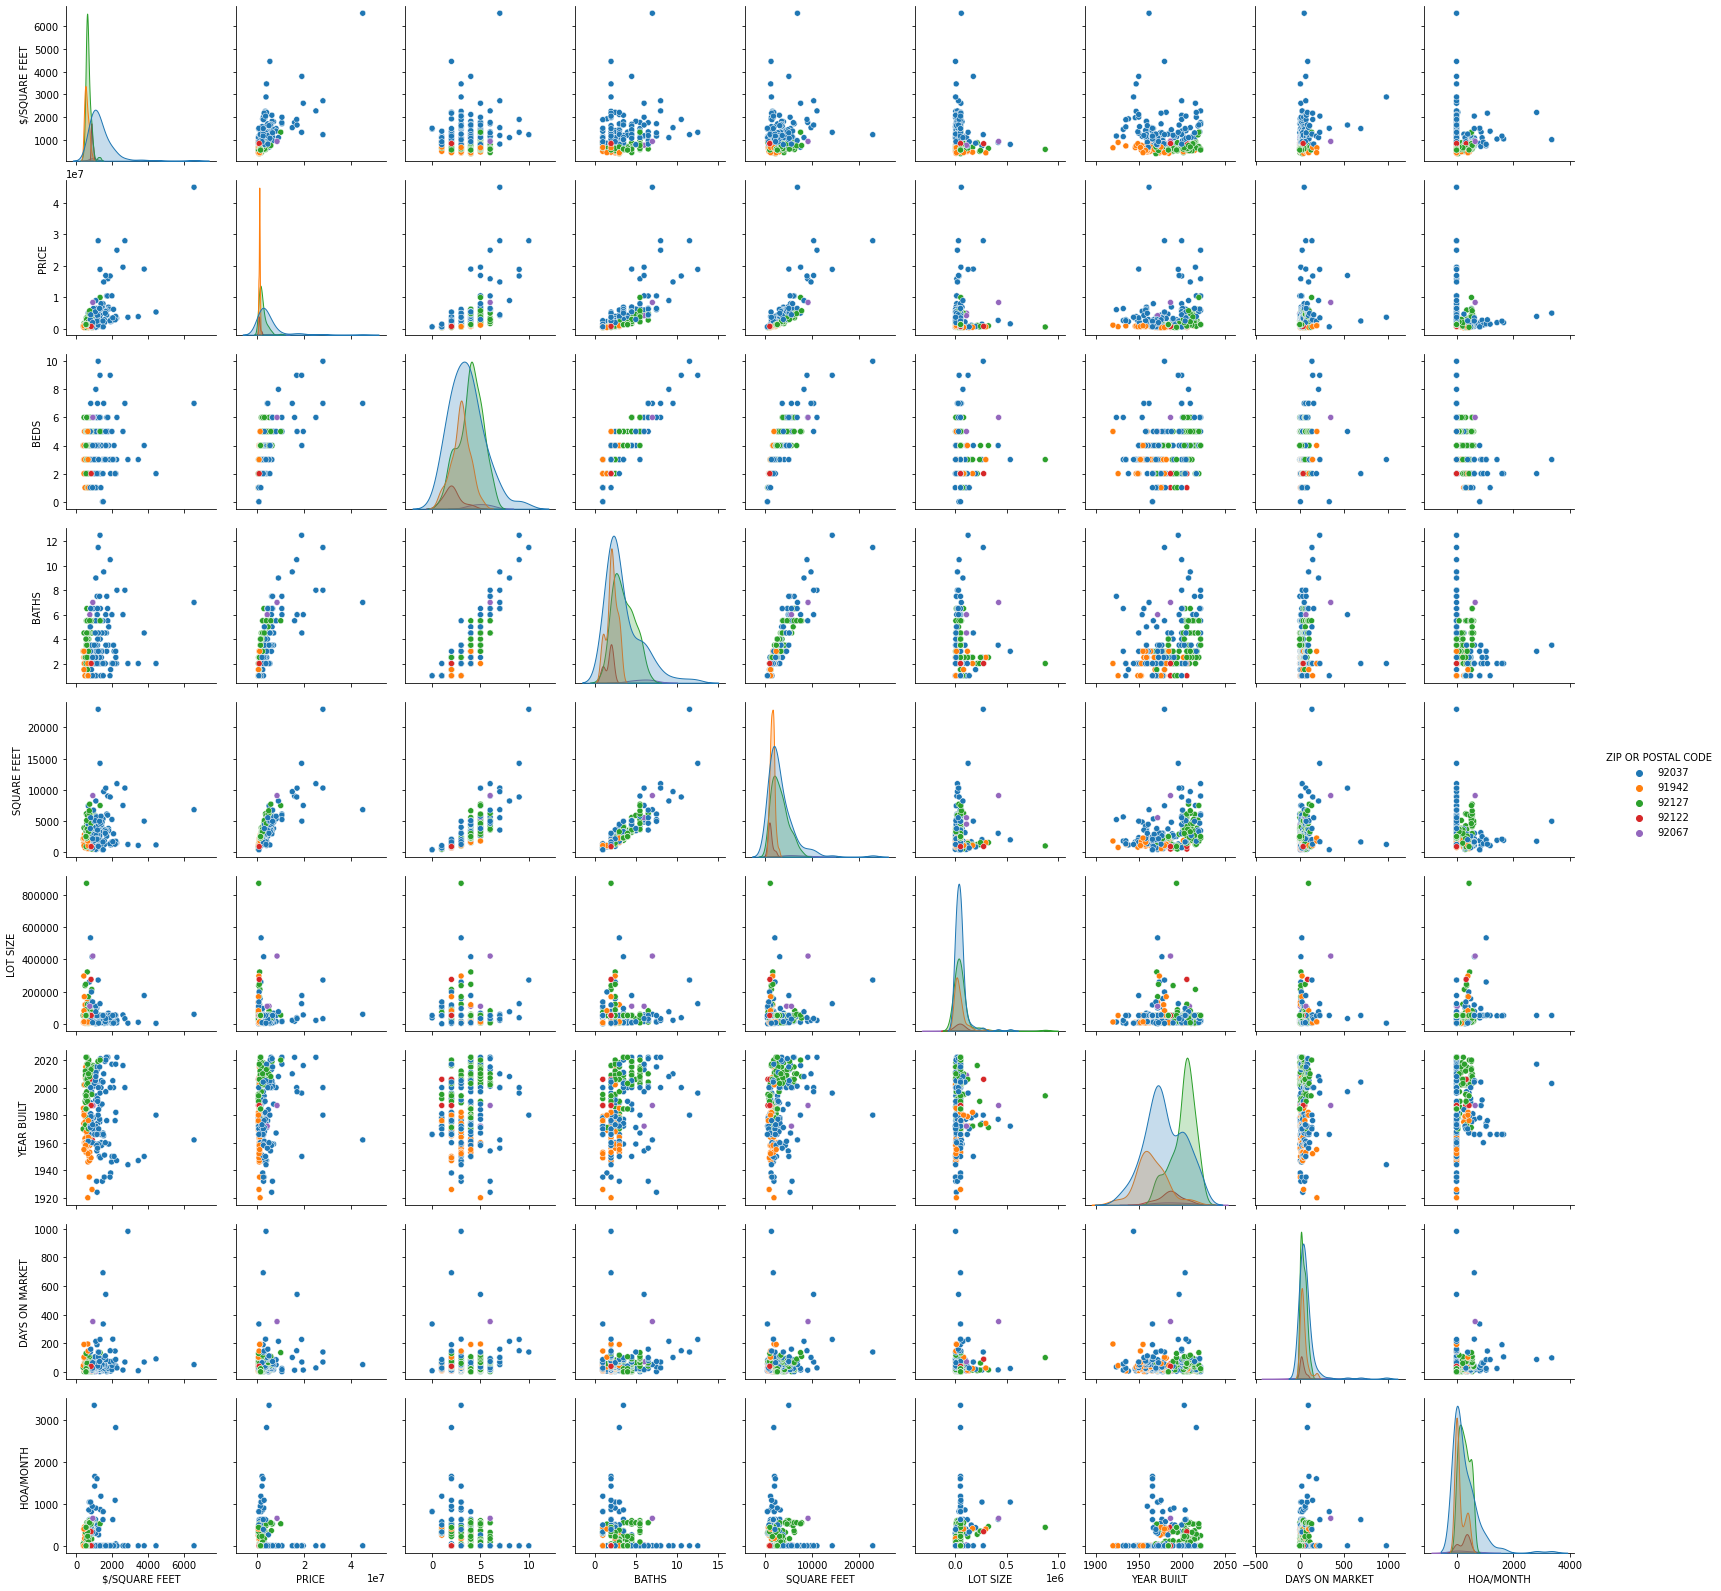

In [1325]:
sns.pairplot(df_mod, vars=['$/SQUARE FEET',	'PRICE',	'BEDS',	'BATHS', 'SQUARE FEET',	'LOT SIZE',	'YEAR BUILT',	'DAYS ON MARKET',	'HOA/MONTH'], hue="ZIP OR POSTAL CODE")

## 2.4) Dataframe Visualization

<AxesSubplot:xlabel='$/SQUARE FEET'>

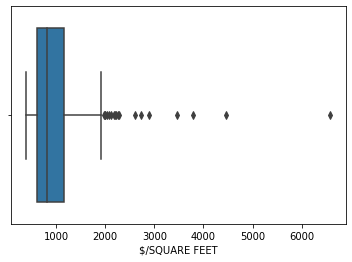

In [1326]:
# Boxblot to visually check for outliers
sns.boxplot(x=df_mod['$/SQUARE FEET'])

<AxesSubplot:title={'center':'Price vs $/Square Feet'}, xlabel='$/SQUARE FEET', ylabel='PRICE'>

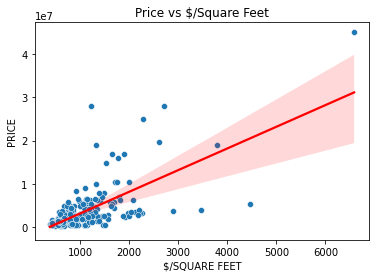

In [1327]:
# Scatterplot to visually check for outliers 
sns.scatterplot(x=df_mod['$/SQUARE FEET'], y=df_mod['PRICE'])
plt.title('Price vs $/Square Feet')
plt.xlabel('$/Square Feet')
plt.ylabel('Price $ (millions)')
# plot trendline 
sns.regplot(x=df_mod['$/SQUARE FEET'], y=df_mod['PRICE'], data=df_mod, scatter=False, color='red')

## 2.5) Convert Categorical Data to Numerical Data

Using One Hot Encoding to convert categorical data to numerical data

In [1356]:
# Adjust Dataframe for Linear Regression Analysis
df_model = pd.get_dummies(df_mod, columns=['ZIP OR POSTAL CODE']) # Convert categorical data to dummy variables
df_model = pd.get_dummies(df_model, columns=['LOCATION']) # Convert categorical data to dummy variables
df_model = pd.get_dummies(df_model, columns=['PROPERTY TYPE']) # Convert categorical data to dummy variables

## 2.6) Setting the Independent and Dependent Variables

Set the independent variables (X) and dependent variable (y)

In [1357]:
X=df_model.drop("$/SQUARE FEET", axis=1) # Drop the target variable from the dataframe
y=df_model["$/SQUARE FEET"] # Set the target variable as the y variable

Display the Independent and Dependent Variables

In [1330]:
# Display the independent variables for the model (X)
print("Number of Independent Variables: ", len(df_model.columns))
print("Independent Variables: ", df_model.columns.values)

Number of Independent Variables:  33
Independent Variables:  ['PRICE' 'BEDS' 'BATHS' 'SQUARE FEET' 'LOT SIZE' 'YEAR BUILT'
 'DAYS ON MARKET' '$/SQUARE FEET' 'HOA/MONTH' 'ZIP OR POSTAL CODE_91942'
 'ZIP OR POSTAL CODE_92037' 'ZIP OR POSTAL CODE_92067'
 'ZIP OR POSTAL CODE_92122' 'ZIP OR POSTAL CODE_92127'
 'LOCATION_91942 - La Mesa' 'LOCATION_92037 - La Jolla'
 'LOCATION_92067 - Rancho Santa Fe' 'LOCATION_92115 - San Diego'
 'LOCATION_92122 - University City' 'LOCATION_92127 - Rancho Bernardo'
 'LOCATION_92128 - Rancho Bernardo' 'LOCATION_Avion' 'LOCATION_La Jolla'
 'LOCATION_La Mesa' 'LOCATION_Rancho Bernardo' 'LOCATION_Rancho Santa Fe'
 'LOCATION_San Diego' 'LOCATION_Santaluz' 'LOCATION_University City'
 'PROPERTY TYPE_Condo/Co-op' 'PROPERTY TYPE_Multi-Family (2-4 Unit)'
 'PROPERTY TYPE_Single Family Residential' 'PROPERTY TYPE_Townhouse']


In [1331]:
# Display the dependent variable for the model (y)
print("Dependent Variable: ", df_model['$/SQUARE FEET'].name)

Dependent Variable:  $/SQUARE FEET


Display the shape of the Independent and Dependent Variables

In [1332]:
# Display the shape of the independent variables (X)
print("Shape of X: ", X.shape)

# Display the shape of the dependent variable (y)
print("Shape of y: ", y.shape)

Shape of X:  (290, 32)
Shape of y:  (290,)


## 2.7 Dataframe Visualization (Correlation)

Probability Density Function (PDF) of the Independent Variables

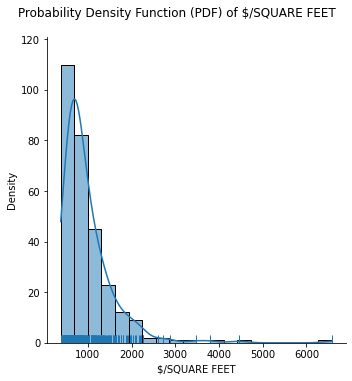

In [1333]:
# Probability Density Function (PDF) of to show the distribution of the data
sns.displot(y, kde=True, rug=True, bins=20).set(xlabel='$/SQUARE FEET', ylabel='Density').fig.suptitle('Probability Density Function (PDF) of $/SQUARE FEET').set_position([.5, 1.05])
plt.show()

Q-Q Plot of the Independent Variables. The goodness of fit is determined by the closeness of the points to the line and currently displays a normal fit.

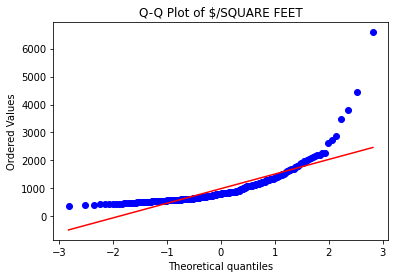

In [1334]:
import scipy.stats as stats
# Q-Q plot to show the distribution of the data
stats.probplot(y, dist="norm", plot=plt)
plt.title("Q-Q Plot of $/SQUARE FEET")
plt.show()

Correlation Matrix of the Independent Variables and Dependent Variable

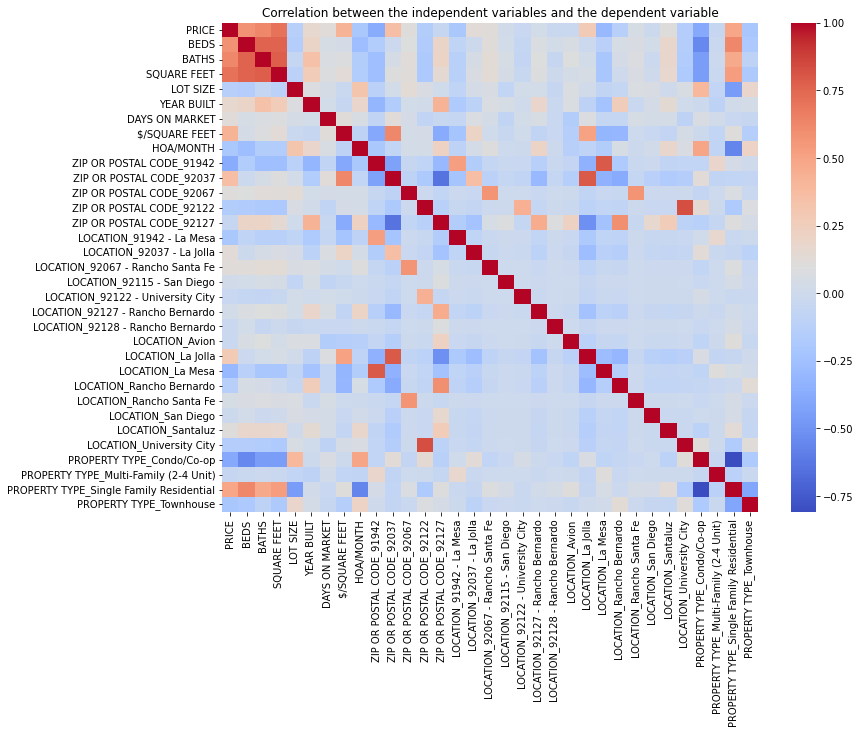

In [1335]:
# Correlation between the independent variables and the dependent variable
corrmat = df_model.corr()
corrmat = df_model.corr(method='kendall') # Kendall Correlation
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, cmap='coolwarm')
plt.title("Correlation between the independent variables and the dependent variable")
plt.show()

Snapshot of the dataframe after preparation

In [1336]:
# Display the new dataframe with dummy variables
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 299
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PRICE                                    290 non-null    int64  
 1   BEDS                                     290 non-null    float64
 2   BATHS                                    290 non-null    float64
 3   SQUARE FEET                              290 non-null    float64
 4   LOT SIZE                                 290 non-null    float64
 5   YEAR BUILT                               290 non-null    float64
 6   DAYS ON MARKET                           290 non-null    float64
 7   $/SQUARE FEET                            290 non-null    float64
 8   HOA/MONTH                                290 non-null    float64
 9   ZIP OR POSTAL CODE_91942                 290 non-null    uint8  
 10  ZIP OR POSTAL CODE_92037                 290 non-n

# 3) Regression Model

## 3.1) Importing Libraries

Importing the necessary libraries to split the dataframe

In [1358]:
# Import Sklearn Libraries
from sklearn.model_selection import train_test_split

## 3.2) Splitting the Dataframe

Splitting the dataframe into training and testing sets (70/30)

In [1359]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 3.3) Dataframe Modeling

Importing the necessary libraries to model the dataframe and Setting the model

In [1360]:
# Set the Linear Regression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## 3.4) Fitting the Model

Fit the model to the training set

In [1361]:
# Fit the model to the training data
lm.fit(X_train, y_train)

# Predict the values of the testing data
y_pred = lm.predict(X_test)

# 4) Model Evaluation

In [1362]:
# Import Libraries for Analysis of MAE and MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 4.1) Model Score 

Scoring the model on the training set (R^2)

In [1363]:
# Score the model on the testing data
model_score = lm.score(X_test, y_test).round(4)
print("Model Score (R Squared): ", model_score)

Model Score (R Squared):  0.8912


Model Score using OLS

In [1343]:
# STATSMODELS Linear Regression Model to show the p-values of each feature
from statsmodels.api import OLS
import statsmodels.api as sm
X = sm.add_constant(X)
lin_model_results = OLS(y, X).fit()
lin_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          $/SQUARE FEET   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     46.09
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           9.72e-86
Time:                        15:00:20   Log-Likelihood:                -2019.6
No. Observations:                 290   AIC:                             4099.
Df Residuals:                     260   BIC:                             4209.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2771.5312   1286.052      2.155      0.032     239.127    5303.935
PRICE                                       0.0002   6.01e-06     26.102      0.000       0.000       0.000
BEDS                                      -68.7397     26.676     -2.577      0.011    -121.268     -16.212
BATHS                                      29.0273     26.594      1.092      0.276     -23.339      81.394
SQUARE FEET                                -0.2144      0.018    -11.833      0.000      -0.250      -0.179
LOT SIZE                                -4.523e-05      0.000     -0.185      0.853      -0.001       0.000
YEAR BUILT                                 -1.6166      0.991     -1.631      0.104      -3.569       0.335
DAYS ON MARKET                              0.8698      0.193      4.510      0.000       0.490       1.250
HOA/MONTH                                   0.1112      0.057      1.963      0.051      -0.000       0.223
ZIP OR POSTAL CODE_91942                  217.2303    339.200      0.640      0.522    -450.698     885.158
ZIP OR POSTAL CODE_92037                  752.4010    313.056      2.403      0.017     135.953    1368.849
ZIP OR POSTAL CODE_92067                  631.4153    397.185      1.590      0.113    -150.693    1413.523
ZIP OR POSTAL CODE_92122                  598.7213    385.040      1.555      0.121    -159.472    1356.915
ZIP OR POSTAL CODE_92127                  571.7634    324.786      1.760      0.080     -67.783    1211.310
LOCATION_91942 - La Mesa                  239.5853    292.685      0.819      0.414    -336.749     815.919
LOCATION_92037 - La Jolla                 208.7914    245.296      0.851      0.395    -274.228     691.811
LOCATION_92067 - Rancho Santa Fe          316.9061    212.247      1.493      0.137    -101.036     734.848
LOCATION_92115 - San Diego                147.6507    288.750      0.511      0.610    -420.936     716.237
LOCATION_92122 - University City          125.8665    385.685      0.326      0.744    -633.598     885.331
LOCATION_92127 - Rancho Bernardo          212.4149    147.405      1.441      0.151     -77.844     502.674
LOCATION_92128 - Rancho Bernardo          -53.8870    288.795     -0.187      0.852    -622.562     514.788
LOCATION_Avion                            -13.3399    173.222     -0.077      0.939    -354.437     327.757
LOCATION_La Jolla                         266.2368    243.021      1.096      0.274    -212.303     744.777
LOCATION_La Mesa                          215.0089    289.986      0.741      0.459    -356.012     786.030
LOCATION_Rancho Bernardo                  110.7812    148.862      0.744      0.457    -182.348     403.910
LOCATION_Rancho Santa Fe                  253.8901    374.2

## 4.2) Visualization (Actual vs Predicted)

Setting the scatterplot of the actual vs predicted values

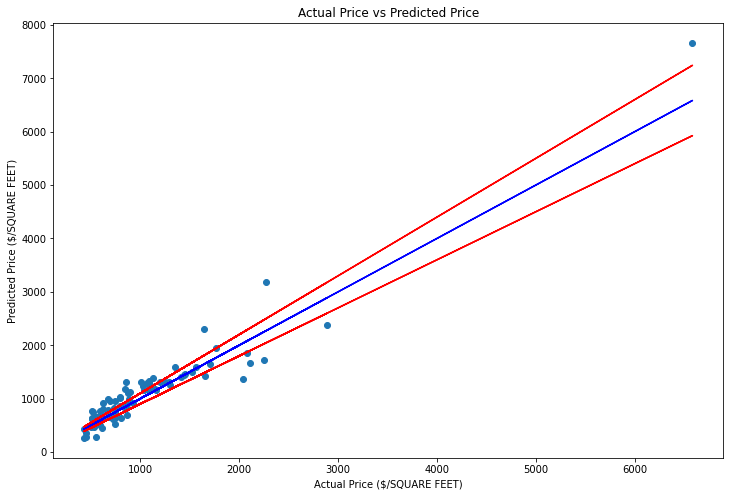

In [1344]:
# Plot the predicted values vs the actual values
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price ($/SQUARE FEET)')
plt.ylabel('Predicted Price ($/SQUARE FEET)')
plt.title('Actual Price vs Predicted Price')
# plot the perfect prediction line
plt.plot(y_test, y_test, color='blue')
# plot the 10% error line
plt.plot(y_test, y_test*1.1, color='red')
# plot the -10% error line
plt.plot(y_test, y_test*0.9, color='red')

plt.show()


## 4.3) Mean Absolute Error (MAE) and Mean Squared Error (MSE)

In [1364]:
# Calculate the Mean Absolute Error (MAE) and Mean Squared Error (MSE)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_mse = mean_squared_error(y_pred, y_test)
lin_msre = np.sqrt(lin_mse)
print("Linear Regression RMSE: %.4f" % lin_msre)
print("Linear Regression MAE: %.4f" % lin_mae)
print("Linear Regression MSE: %.4f" % lin_mse)

Linear Regression RMSE: 255.1428
Linear Regression MAE: 170.7676
Linear Regression MSE: 65097.8261


# 5) Model Prediction Test (User Input)

Test the model with a house from the dataset

In [1375]:
from random import random
import numpy as np
    
def rand_model_test(house_index): 
    house = df_model.iloc[house_index]
    # 
     # Predict the price of the house
    predict = (lm.predict([house.drop('$/SQUARE FEET')])).round(2) # Predict the price of the house
    print("Predicted Price", predict[0], "($/SQUARE FEET)") # Display the predicted price of the house
    print("Actual Price:", house["$/SQUARE FEET"], "($/SQUARE FEET)") # Display the price of the house

    # Display the difference between the predicted and actual price of the house
    difference = (predict[0] - house["$/SQUARE FEET"]).round(2)
    print("Difference:", difference, "($/SQUARE FEET)") 

    # Display the percent difference between the predicted and actual price of the house
    percent = ((difference / house["$/SQUARE FEET"]) * 100).round(2)
    print("Percent Difference:", percent, "(%)") 

    # Display the percent error between the predicted and actual price of the house
    error = ((predict[0] - house["$/SQUARE FEET"])/predict[0]*100).round(2)
    print("Percent Error:", error, "(%)") 

    # Additional Information about the house
    # print(house) # Display the additional information about the house
    
    
# Display the results of the model test for a random house
randomHouse = np.random.randint(0, len(df_model))
rand_model_test(randomHouse) # Display the results of the model test for the first house



Predicted Price 481.9 ($/SQUARE FEET)
Actual Price: 486.0 ($/SQUARE FEET)
Difference: -4.1 ($/SQUARE FEET)
Percent Difference: -0.84 (%)
Percent Error: -0.85 (%)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 6) Conclusion

In [1347]:
# Statistical Analysis of the Linear Regression Model Confidence Interval
confidence = 0.95 # 95% Confidence Interval
n = len(df_model) # Number of observations
mean = df_model['$/SQUARE FEET'].mean().round(4) # Mean of the data
quantile_25 = df_model['$/SQUARE FEET'].quantile(0.25).round(4) # 25th Quantile of the data
t = stats.t.ppf((1 + confidence) / 2, n - 1) # t-statistic for 95% confidence
SD = df_model['$/SQUARE FEET'].std().round(4) # Standard Deviation of the data
MOE = t * (SD / np.sqrt(n)) # Margin of Error

print("Size: ", n)
print("Mean Price: ", mean)
print("25th Quantile: ", quantile_25)
print("Standard Dev: ", SD)
print("Margin of Error: ", MOE.round(2))
print("95% Confidence Interval: ", (mean - MOE).round(2), "to", (mean + MOE).round(2))


Size:  290
Mean Price:  988.7172
25th Quantile:  611.75
Standard Dev:  635.5966
Margin of Error:  73.46
95% Confidence Interval:  915.26 to 1062.18


Hypothesis Testing

<ol><li>H0: The predicted price is less than or equal to the actual price</li><li>H1: The predicted price is greater than the actual price</li></ol>




In [1348]:
# T-Test and Hypothesis Test for the Linear Regression Model
# Import Libraries
from scipy import stats

# Hypothesis test for the predicted price and the 25th Quartile
# H0: The predicted price is less than or equal to the 25th Quartile
# H1: The predicted price is greater than the 25th Quartile

# Ttest for the mean of 20 random houses in the dataset
# Mean of the sample 20 houses
sample_mean = df_model['$/SQUARE FEET'].sample(20).mean()
# SD of the sample 20 houses
sample_sd = df_model['$/SQUARE FEET'].sample(20).std()


# Predicted price of the sample 20 houses 
predicted_price = (lm.predict(df_model.drop('$/SQUARE FEET', axis=1).sample(20)))
# 25th Quantile of the sample 20 houses
quantile_25 = df_model['$/SQUARE FEET'].quantile(0.25)
# ttest for the mean of 25th Quantile vs the mean of predicted price
ttest = stats.ttest_1samp(predicted_price, quantile_25)


# Display the results of the ttest
print("T-Test of the Sample 20 Houses")

print("T-Test: ", ttest)
print("Sample Mean of the Predicted Price: ", predicted_price.mean())
print("Sample SD of the Predicted Price: ", predicted_price.std())
print("25th Quantile: ", quantile_25)



# If the p-value is less than 0.05, then we reject the null hypothesis
# If the p-value is greater than 0.05, then we fail to reject the null hypothesis
if ttest[1] < 0.05:
    print("Reject the Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")
    
print("Conclusion: The predicted price is greater than the 25th Quantile") if ttest[1] < 0.05 else print("Conclusion: The predicted price is less than or equal to the 25th Quantile")

T-Test of the Sample 20 Houses
T-Test:  Ttest_1sampResult(statistic=2.112344959833596, pvalue=0.048121966633116645)
Sample Mean of the Predicted Price:  829.0138127085495
Sample SD of the Predicted Price:  448.3316038302377
25th Quantile:  611.75
Reject the Null Hypothesis
Conclusion: The predicted price is greater than the 25th Quantile


# Extra

Test the same model with a new dataset

In [1349]:
# Import the NEW complete redfin dataset
df_new = pd.io.parsers.read_csv("./redfin_2022-10-09-15-54-14-new-to-check-H0-regression.csv", dtype={'ZIP OR POSTAL CODE': 'str'})

# Prepare the NEW dataset with feature cleaning
# Drop the data columns that are not relevant and display the snapshot of the new dataframe
df_new_mod = df_new.drop(['SALE TYPE', 'CITY', 'STATUS', 'STATE OR PROVINCE', 'SOLD DATE', 'ADDRESS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'], axis=1)

# Fill NA values of "DAYS ON MARKET" with 0
df_new_mod["DAYS ON MARKET"].fillna(0, inplace = True)

# Drop Rows where "Property Type" is "Vacant Land"
vacant_land = df_new_mod[df_new_mod['PROPERTY TYPE'] == 'Vacant Land'].index
df_new_mod.drop(vacant_land, inplace = True)

# Fill NA values of "HOA" with "0"
df_new_mod["HOA/MONTH"].fillna(0, inplace=True)

# Fill NA "Lot Size" with Mean Value
df_new_mod["LOT SIZE"].fillna(df_new_mod['LOT SIZE'].mean(), inplace=True)

# Fill NA "Year Built" with Mean Value
df_new_mod["YEAR BUILT"].fillna(df_new_mod['YEAR BUILT'].mean(), inplace=True)

# Fill NA "BEDS" with Mean Value 
df_new_mod["BEDS"].fillna(df_new_mod['BEDS'].mean(), inplace=True)

# Fill NA "BATHS" with Mean Value
df_new_mod["BATHS"].fillna(df_new_mod['BATHS'].mean(), inplace=True)

# Adjust Dataframe for Linear Regression Analysis
df_new_model = pd.get_dummies(df_new_mod, columns=['ZIP OR POSTAL CODE']) # Convert categorical data to dummy variables
df_new_model = pd.get_dummies(df_new_model, columns=['LOCATION']) # Convert categorical data to dummy variables
df_new_model = pd.get_dummies(df_new_model, columns=['PROPERTY TYPE']) # Convert categorical data to dummy variables

# Prepare Data for Prediction
# Create X and y dataframes for the model
X_new=df_new_model.drop("$/SQUARE FEET", axis=1) # Drop the target variable from the dataframe
y_new=df_new_model["$/SQUARE FEET"] # Set the target variable as the y variable

# Split the data into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.3, random_state=1)

# Fit the model to the training data
lm_new = lm
lm_new.fit(X_new_train, y_new_train)

# Predict the values of the testing data
y_new_pred = lm_new.predict(X_new_test)

# New Model Scoring Metrics
model_new_score = lm_new.score(X_new_test, y_new_test).round(4)
print("New Dataset -> Model Score (R Squared): ", model_new_score)

# OLS of new model
X_new = sm.add_constant(X_new)
lin_new_model_results = OLS(y_new, X_new).fit()
lin_new_model_results.summary()

# Calculate the Mean Absolute Error (MAE) and Mean Squared Error (MSE)
lin_new_mae = mean_absolute_error(y_new_test, y_new_pred)

# lin_new_mse = mean_squared_error(y_new_pred, y_new_test) # Issue with callable object
# lin_new_msre = np.sqrt(lin_new_mse) # Issue with callable object
# print("New Dataset -> Linear Regression RMSE: %.4f" % lin_new_msre) # Issue with callable object
print("New Dataset -> Linear Regression MAE: %.4f" % lin_new_mae)
# print("New Dataset -> Linear Regression MSE: %.4f" % lin_new_mse) # Issue with callable object

# Test the model with a house from the dataset
house_new_Index = 111 # <----- Change this value to test a different house 
house_new = df_new_model.iloc[house_new_Index] 

# Predict the price of the house
predict_new = (lm_new.predict([house_new.drop('$/SQUARE FEET')])).round(2) # Predict the price of the house
print("New Dataset -> Predicted Price", predict_new[0], "($/SQUARE FEET)") # Display the predicted price of the house
print("New Dataset -> Actual Price:", house_new["$/SQUARE FEET"], "($/SQUARE FEET)") # Display the price of the house

# Display the difference between the predicted and actual price of the house
difference_new = (predict_new[0] - house_new["$/SQUARE FEET"]).round(2)
print("New Dataset -> Difference:", difference_new, "($/SQUARE FEET)") 

# Display the percent difference between the predicted and actual price of the house
percent_new = ((difference_new / house_new["$/SQUARE FEET"]) * 100).round(2)
print("New Dataset -> Percent Difference:", percent_new, "(%)") 

# Display the percent error between the predicted and actual price of the house
error_new = ((predict_new[0] - house_new["$/SQUARE FEET"])/predict_new[0]*100).round(2)
print("New Dataset -> Percent Error:", error_new, "(%)") 

# # Additional Information about the house
# house_new

New Dataset -> Model Score (R Squared):  0.7353
New Dataset -> Linear Regression MAE: 88.4579
New Dataset -> Predicted Price 550.08 ($/SQUARE FEET)
New Dataset -> Actual Price: 522.0 ($/SQUARE FEET)
New Dataset -> Difference: 28.08 ($/SQUARE FEET)
New Dataset -> Percent Difference: 5.38 (%)
New Dataset -> Percent Error: 5.1 (%)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1350]:
# Compare the model performance of the new dataset to the original dataset
print("Model Score (R Squared): ", model_score, 'vs', model_new_score)
# print("Linear Regression RMSE: %.4f" % lin_msre, 'vs', lin_new_msre.round(4))
print("Linear Regression MAE: %.4f" % lin_mae, 'vs', lin_new_mae.round(4))
# print("Linear Regression MSE: %.4f" % lin_mse, 'vs', lin_new_mse.round(4))


Model Score (R Squared):  0.8912 vs 0.7353
Linear Regression MAE: 170.7676 vs 88.4579
